In [26]:
import pandas as pd


df = pd.read_csv("../../data/Housing.csv")

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [27]:

df.columns

df.dtypes


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [28]:

df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [29]:
# Summary statistics
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


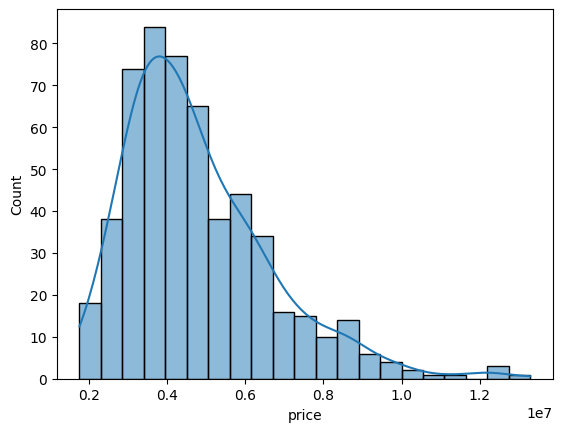

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of house prices
sns.histplot(df['price'], kde=True)
plt.show()


In [31]:
# Cell 6: Prepare features
X = df.drop('price', axis=1)
y = df['price']

print("Original shape:", X.shape, y.shape)
print("\nData types before encoding:")
print(X.dtypes)

Original shape: (545, 12) (545,)

Data types before encoding:
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [35]:
# Cell 7: Convert categorical columns to numeric (BEFORE train_test_split)
X = pd.get_dummies(X, drop_first=True)
print("Shape after encoding:", X.shape)
print("\nData types after encoding:")
print(X.dtypes)

Shape after encoding: (545, 13)

Data types after encoding:
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_yes                        bool
guestroom_yes                       bool
basement_yes                        bool
hotwaterheating_yes                 bool
airconditioning_yes                 bool
prefarea_yes                        bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object


In [36]:

# Cell 8: Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=" * 50)
print("DATA SPLIT SUMMARY")
print("=" * 50)
print(f"Total samples: {len(X)}")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")
print("\nTraining set price statistics:")
print(y_train.describe())
print("\nTest set price statistics:")
print(y_test.describe())

DATA SPLIT SUMMARY
Total samples: 545
Training set size: 436 samples (80.0%)
Test set size: 109 samples (20.0%)
Number of features: 13

Training set price statistics:
count    4.360000e+02
mean     4.706527e+06
std      1.757976e+06
min      1.750000e+06
25%      3.498250e+06
50%      4.291000e+06
75%      5.600000e+06
max      1.225000e+07
Name: price, dtype: float64

Test set price statistics:
count    1.090000e+02
mean     5.007537e+06
std      2.258622e+06
min      1.750000e+06
25%      3.290000e+06
50%      4.550000e+06
75%      6.510000e+06
max      1.330000e+07
Name: price, dtype: float64


In [37]:
# Cell 9: Train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Number of coefficients: {len(model.coef_)}")
print(f"Intercept: {model.intercept_:.2f}")

Model trained successfully!
Number of coefficients: 13
Intercept: 260032.36


In [38]:
# Cell 10: Make predictions on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("First 10 predictions on test set:")
print(y_test_pred[:10])
print("\nActual prices for comparison:")
print(y_test.values[:10])

First 10 predictions on test set:
[5164653.90033967 7224722.29802167 3109863.24240338 4612075.3272256
 3294646.25725955 3532275.09556558 5611774.56836476 6368145.98732718
 2722856.95689985 2629405.61585782]

Actual prices for comparison:
[4060000 6650000 3710000 6440000 2800000 4900000 5250000 4543000 2450000
 3353000]


In [39]:
# Cell 11: Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Training metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print("\nTRAINING SET:")
print(f"RMSE: {train_rmse:,.2f}")
print(f"MAE:  {train_mae:,.2f}")
print(f"R² Score: {train_r2:.4f}")

print("\nTEST SET:")
print(f"RMSE: {test_rmse:,.2f}")
print(f"MAE:  {test_mae:,.2f}")
print(f"R² Score: {test_r2:.4f}")

MODEL PERFORMANCE METRICS

TRAINING SET:
RMSE: 984,051.92
MAE:  719,242.89
R² Score: 0.6859

TEST SET:
RMSE: 1,324,506.96
MAE:  970,043.40
R² Score: 0.6529


In [40]:
# Cell 12: Display feature coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("=" * 50)
print("FEATURE IMPORTANCE (COEFFICIENTS)")
print("=" * 50)
print(coeff_df.to_string(index=False))

FEATURE IMPORTANCE (COEFFICIENTS)
                        Feature   Coefficient
                      bathrooms  1.094445e+06
            airconditioning_yes  7.914267e+05
            hotwaterheating_yes  6.846499e+05
                   prefarea_yes  6.298906e+05
                        stories  4.074766e+05
                   basement_yes  3.902512e+05
                   mainroad_yes  3.679199e+05
                  guestroom_yes  2.316100e+05
                        parking  2.248419e+05
                       bedrooms  7.677870e+04
                           area  2.359688e+02
furnishingstatus_semi-furnished -1.268818e+05
   furnishingstatus_unfurnished -4.136451e+05


In [41]:
# Cell 13: Save the model
import joblib

joblib.dump(model, "house_price_model.pkl")
print("✓ Model saved as 'house_price_model.pkl'")

✓ Model saved as 'house_price_model.pkl'


In [43]:
# Save both model and feature names
import joblib

# Save model with feature names
model_data = {
    'model': model,
    'feature_names': X.columns.tolist()
}

joblib.dump(model_data, "house_price_model.pkl")
print("✓ Model and feature names saved as 'house_price_model.pkl'")
print(f"✓ Model features ({len(X.columns)}): {list(X.columns)}")

✓ Model and feature names saved as 'house_price_model.pkl'
✓ Model features (13): ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


In [42]:
# Cell 14: Load and test the saved model
loaded_model = joblib.load("house_price_model.pkl")

sample_input = X_test.iloc[0:1]
predicted_price = loaded_model.predict(sample_input)[0]
actual_price = y_test.iloc[0]

print("=" * 50)
print("MODEL PREDICTION TEST")
print("=" * 50)
print(f"Predicted Price: PKR {predicted_price:,.0f}")
print(f"Actual Price:    PKR {actual_price:,.0f}")
print(f"Difference:      PKR {abs(predicted_price - actual_price):,.0f}")
print(f"Error %:         {abs(predicted_price - actual_price)/actual_price*100:.2f}%")

MODEL PREDICTION TEST
Predicted Price: PKR 5,164,654
Actual Price:    PKR 4,060,000
Difference:      PKR 1,104,654
Error %:         27.21%
